In [1]:
#importing required Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# DATA LOADING AND OVERVIEW

In [2]:
#importing dataset
df=pd.read_csv(r"C:\Users\Radvolt\Downloads\Udemy Course Dataset.csv")

In [3]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


# DATA CLEANING AND PREPROCESSING

In [5]:
#converting published_timestamp to datetime object
df["published_timestamp"]=pd.to_datetime(df["published_timestamp"])

In [6]:
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [7]:
#making a copy of the dataframe
df_new=df.copy()

In [8]:
#converting to published_timestamp to datetime object
df_new["Year"]=df_new["published_timestamp"].dt.year
df_new["Month"]=df_new["published_timestamp"].dt.month

In [9]:
# Function to convert duration to minutes
def to_minutes(duration):
    num = duration.split()[0]  # Get the first part (number)
    return int(float(num) * 60) if "hour" in duration else int(num)

# Applying conversion
df_new['content_duration_minutes'] = df_new['content_duration'].apply(to_minutes)

In [10]:
#Creating course classification based on Course duration

def classify_course(duration):
    hours = duration / 60  # Convert minutes to hours
    if hours <= 2:
        return "Quick Learning"
    elif hours <= 5:
        return "Short Course"
    elif hours <= 10:
        return "Standard Course"
    elif hours <= 20:
        return "Comprehensive Course"
    elif hours <= 40:
        return "Advanced Course"
    else:
        return "Bootcamp"

df_new['course_category'] = df_new['content_duration_minutes'].apply(classify_course)


# EXPLORATORY DATA ANALYSIS (EDA)

In [11]:
df_new.describe()

,course_id,num_subscribers,num_reviews,num_lectures,Year,Month,content_duration_minutes
count,3.682000e+03,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182,2015.432917,6.164041,245.497012
std,3.436355e+05,9499.378361,934.957204,50.373299,1.185800,3.378702,363.081062
min,8.324000e+03,0.000000,0.000000,0.000000,2011.000000,1.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000,2015.000000,3.000000,60.000000
50%,6.885580e+05,911.500000,18.000000,25.000000,2016.000000,6.000000,120.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000,2016.000000,9.000000,270.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000,2017.000000,12.000000,4710.000000


In [12]:
df_new["subject"].value_counts()

subject
Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

In [13]:
df_new["level"].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [14]:
df_new["Year"].unique()

array([2014, 2017, 2016, 2015, 2013, 2012, 2011])

In [29]:
df_new["is_paid"].value_counts()

is_paid
True     3372
False     310
Name: count, dtype: int64

# DATA ANALYSIS AND VISUALIZATION

## Key Questions & Insights  

1. **Which course category has the highest number of courses?**  
2. **Do longer courses attract more subscribers?**  
3. **Is there a preferred course length that tends to have higher enrollments?**  
4. **Which subject has the highest number of courses?**  
5. **How has the number of courses published changed over the years?**  
6. **What percentage of Udemy courses are free vs. paid?**  
7. **Do free courses attract more subscribers than paid ones?**  
8. **Which course level has the highest number of subscribers?**  

The following codes and visualizations aim to answer these questions.


In [15]:
#creating a df for plotting Number of courses by category
df_course=df_new.groupby(["course_category"]).size().reset_index(name="Number_of_courses").sort_values(by="Number_of_courses",ascending= False)

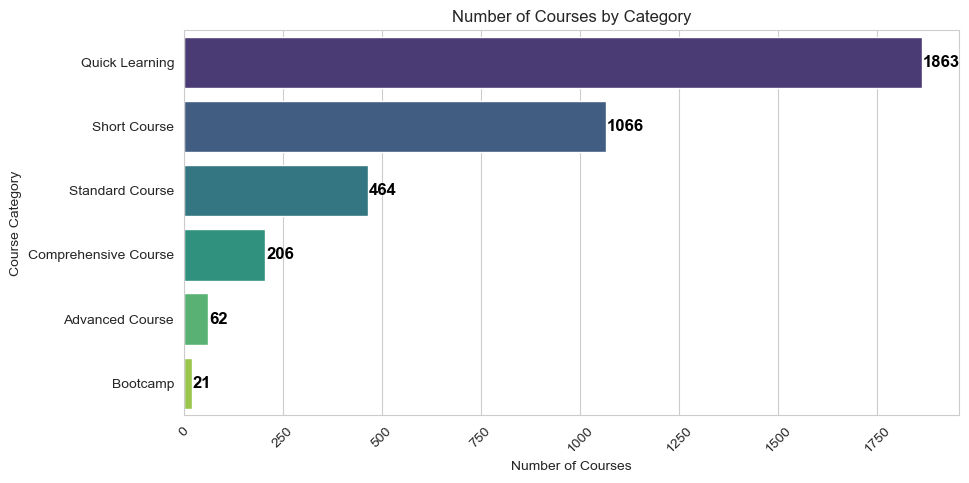

In [16]:
#-1-Which Course category has the highest number of courses?
#-2-Do longer courses attract more subscribers?
#-3-Is there a preferred course length that tends to have higher enrollments?

#Horizontal bar graph showing Number of Courses by Category
# Set style
sns.set_style("whitegrid")

# Plot bar chart
plt.figure(figsize=(10, 5))

ax=sns.barplot(data=df_course, y="course_category", x="Number_of_courses", hue="course_category" , palette="viridis")

for n, val in enumerate(df_course["Number_of_courses"]):
    ax.text(val + 2, n, str(val), va="center", fontsize=12, color="black", fontweight="bold")  
    
# Labels & Title
plt.ylabel("Course Category")
plt.xlabel("Number of Courses")
plt.title("Number of Courses by Category")
plt.xticks(rotation=45)  # Rotate category labels for readability
# Show the plot
plt.show()


In [17]:
df_category=df_new[["subject","num_subscribers"]].copy()
df_category=df_category.groupby(["subject"])["num_subscribers"].sum().reset_index()
df_category

,subject,num_subscribers
0,Business Finance,1870747
1,Graphic Design,1063148
2,Musical Instruments,846689
3,Web Development,7980572


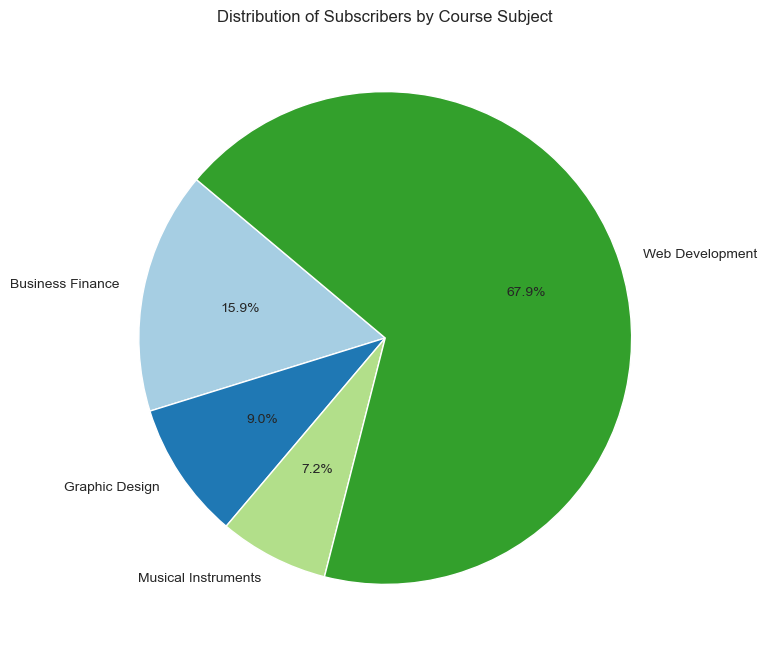

In [18]:
#-4-Which subject has the highest number of courses?

#pie chart for Distribution of Subscribers by Course Subject

# Define colors
colors = sns.color_palette("Paired")

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_category["num_subscribers"], labels=df_category["subject"], autopct="%1.1f%%",
        colors=colors, startangle=140 )

# Title
plt.title("Distribution of Subscribers by Course Subject")

# Show the plot
plt.show()

In [19]:
df_year=df_new[["Year","Month"]].copy()
df_year=df_year.groupby(["Year"]).size().reset_index(name= "Number of Courses")

In [20]:
df_year

,Year,Number of Courses
0,2011,5
1,2012,45
2,2013,202
3,2014,491
4,2015,1014
5,2016,1206
6,2017,719


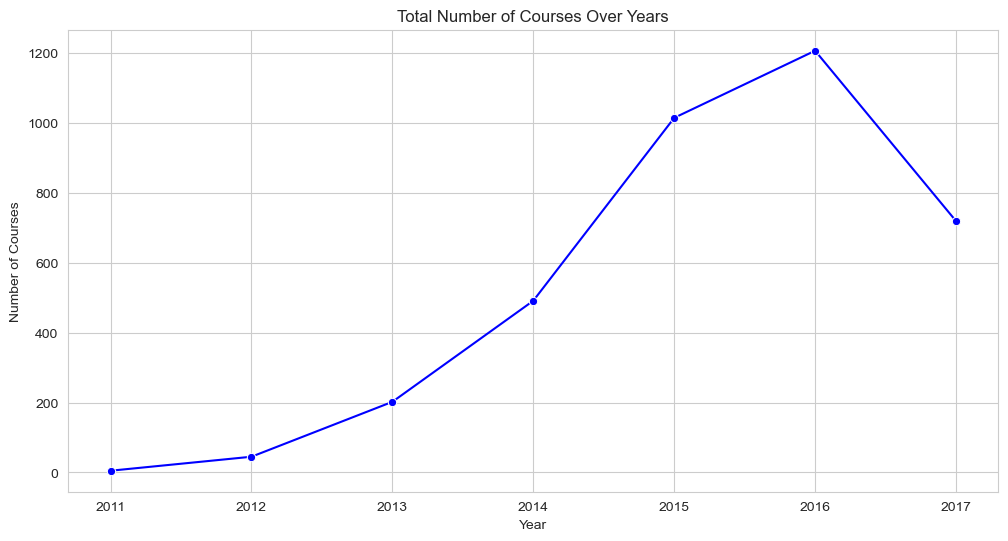

In [21]:
#-5-How has the number of courses published changed over the years?

#Line chart plotting Total number of Courses Over Years
# Set style
sns.set_style("whitegrid")

# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_year, x="Year", y="Number of Courses", marker="o", color="blue")

# Labels & Title
plt.xlabel("Year")
plt.ylabel("Number of Courses")
plt.title("Total Number of Courses Over Years")
plt.xticks(df_year["Year"])  # Ensure all years appear on x-axis

# Show plot
plt.show()


In [22]:
df_paid=df_new.groupby(["is_paid"]).size().reset_index(name="Number")

In [23]:
df_paid["is_paid"] = df_paid["is_paid"].replace({True: "Paid", False: "Free"})

df_paid

,is_paid,Number
0,Free,310
1,Paid,3372


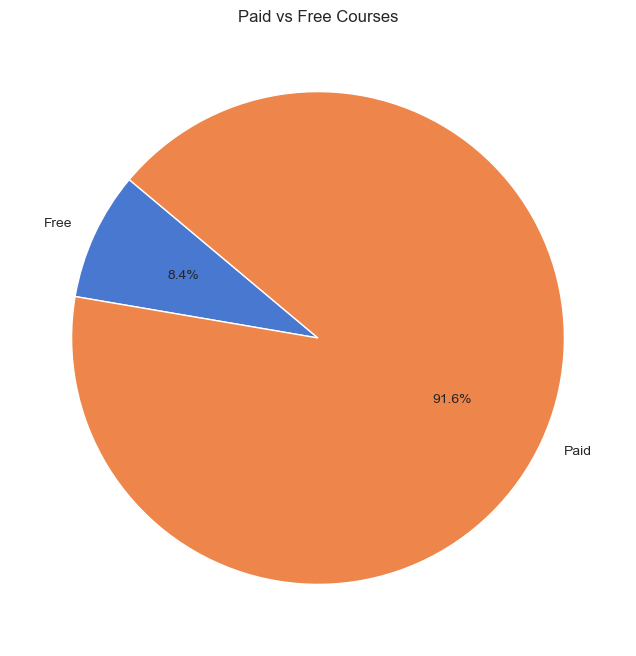

In [24]:
#-6-What percentage of Udemy courses are free vs. paid?

#Pie chart showing Paid vs Free Courses

# Define colors
colors = sns.color_palette("muted")

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_paid["Number"], labels=df_paid["is_paid"], autopct="%1.1f%%",
        colors=colors, startangle=140)

# Title
plt.title("Paid vs Free Courses")

# Show the plot
plt.show()


In [30]:
#-7-Do free courses attract more subscribers than paid ones?

df_new.groupby(["is_paid"])["num_subscribers"].sum().reset_index().sort_values(by="num_subscribers",ascending=False)

,is_paid,num_subscribers
1,True,8185631
0,False,3575525


In [26]:
#-8-Which course level has the highest number of subscribers?

df_new.groupby(["level"])["num_subscribers"].sum().reset_index().sort_values(by="num_subscribers", ascending=False)

,level,num_subscribers
0,All Levels,6916112
1,Beginner Level,4052843
3,Intermediate Level,742005
2,Expert Level,50196


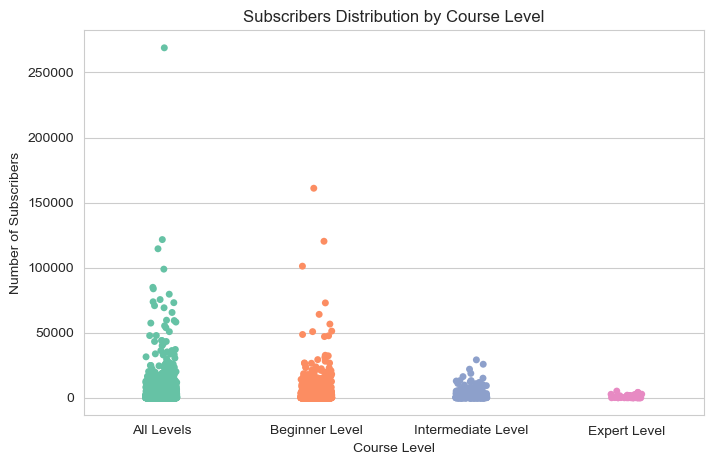

In [27]:
#Subscribers Distribution by course level

df_new=df_new.sort_values(by="num_subscribers",ascending = False)

plt.figure(figsize=(8, 5))
sns.stripplot(data=df_new, x="level", y="num_subscribers", jitter=True, hue="level",palette="Set2")
plt.xlabel("Course Level")
plt.ylabel("Number of Subscribers")
plt.title("Subscribers Distribution by Course Level")

plt.show()


##  Key Insights
- **Web Development Courses** attract the highest number of subscribers.
- Most courses fall under **Beginner and All Levels**, highlighting strong demand for entry-level content.
- **Paid courses** generally have significantly higher enrollments than Free courses.
- Udemy experienced rapid course growth from **2014 to 2016**, indicating a surge in content creation. This could be due to increasing adoption of online learning and more instructors joining the platform.
- The majority **(91.6%)** of Udemy courses are paid, while only **8.4%** are free.
- Despite **free courses** being only **8.4%** of total courses, they still attract a significant number of subscribers.
- The dominance of **Quick Learning** and **Short Courses** suggests that Udemy learners prefer concise and time-efficient courses over longer, more detailed ones.

